## Assignment-1

In [325]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [443]:
df = pd.read_csv('cryptocompare_btc.csv')
df['average'] = df['volumeto']/df['volumefrom']
df;

# Relationship b/w Variables

The following figure tells us that overall a non-linear model could fit better (the red graph curve is drawn to show the overall relation)

![image](img-4.png)

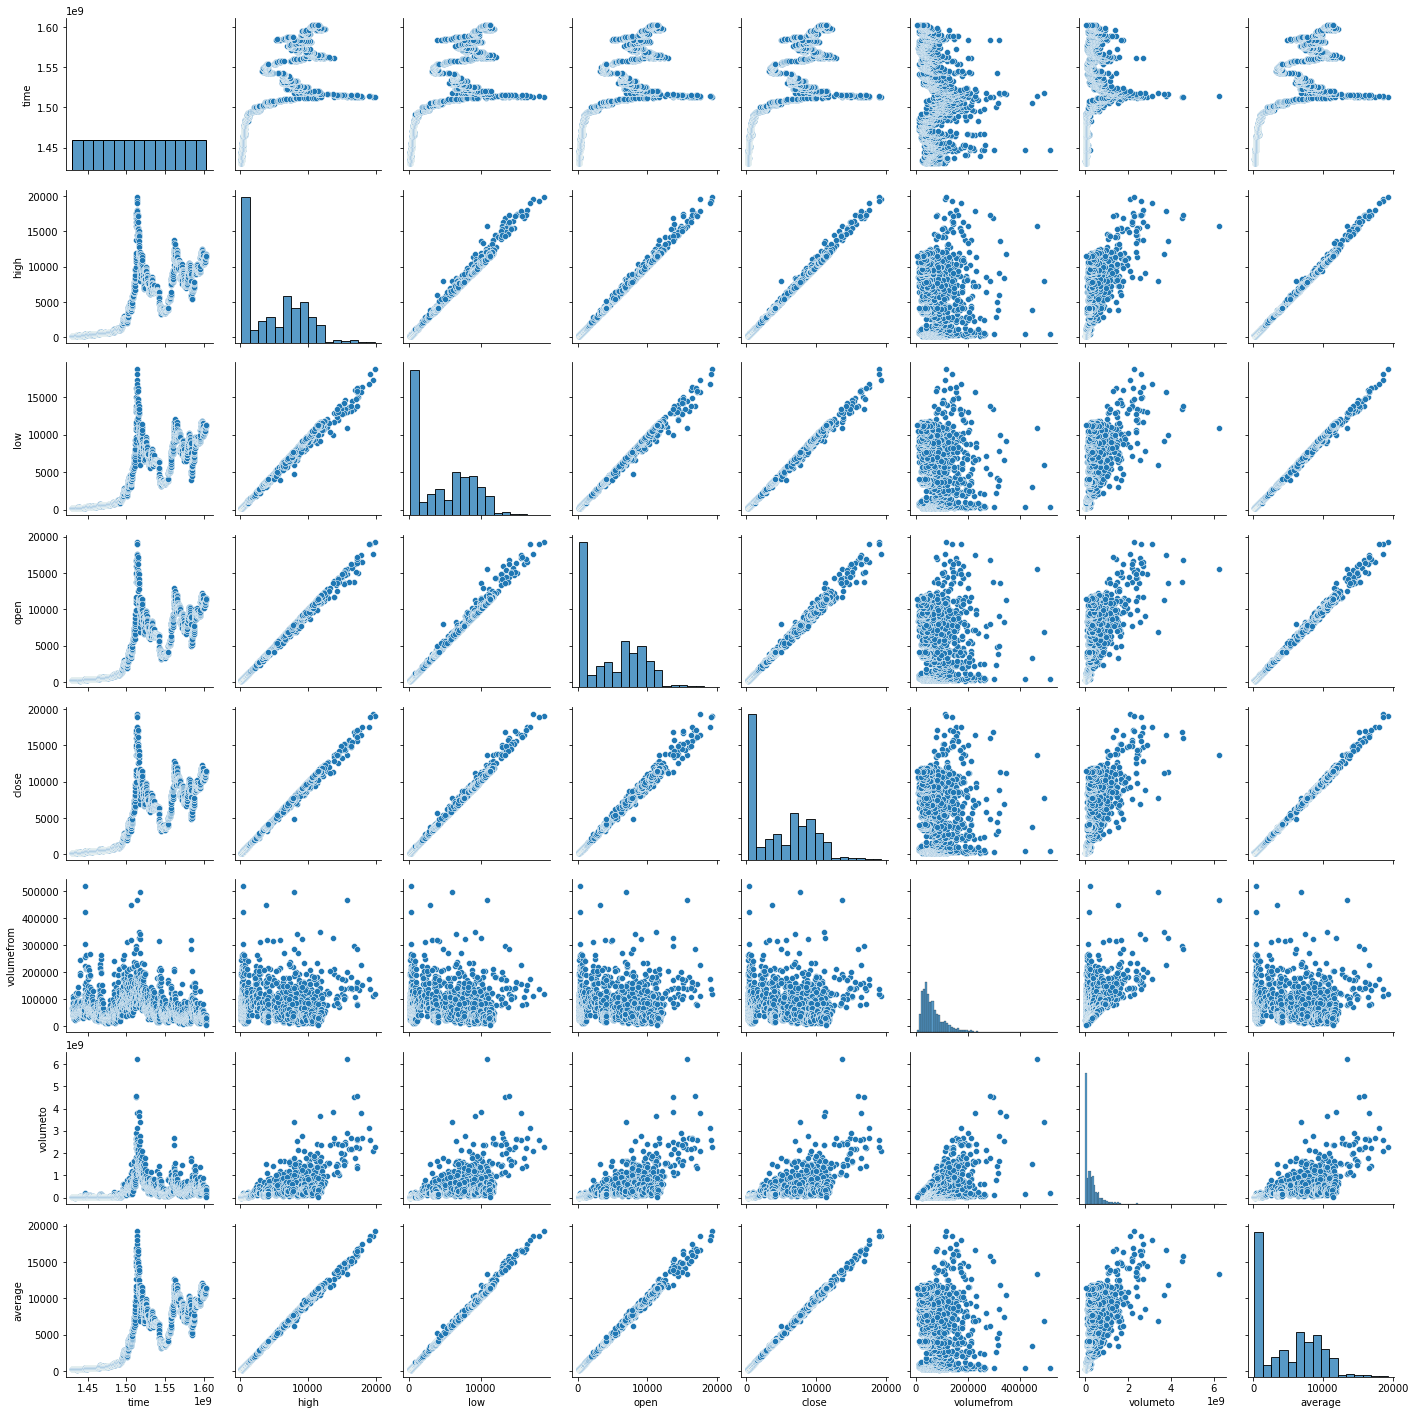

In [357]:
sns.pairplot(df)

From the figure above, we can see that following features have a **linear relation** with target variable (volume average)
- High
- Close
- Open
- Close
- Volume-To
- Volume-From (weak relation but can help in generalizing)

# Feature Scaling

In [358]:
class Scaler:
    def __init__(self, X):
        self.X = X
        self.transformed_X = None
        self.x_mean = np.mean(X)
        self.x_std_dev = np.std(X)
    
    def min_max_normalization(self):
        self.transformed_X = np.divide(np.subtract(self.X,self.x_mean),
                                       np.subtract(np.max(self.X),np.min(self.X)))
        return self.transformed_X
    
    def standardize(self):
        self.transformed_X = np.divide(np.subtract(self.X,self.x_mean),self.x_std_dev)
        return self.transformed_X



# Errors

In [390]:
def mean_square_error(actual,predicted):
    if (len(actual) == len(predicted)):
        sum_of_squared_residuals = np.sum(np.square(np.subtract(actual,predicted)))
        mse = np.divide(sum_of_squared_residuals,len(actual))
        return(mse)
    else:
        print("Size Error")

def root_mean_square_error(actual,predicted):
    if (len(actual) == len(predicted)):
        sum_of_squared_residuals = np.sum(np.square(np.subtract(actual,predicted)))
        rmse = np.sqrt(np.divide(sum_of_squared_residuals,len(actual)))
        return(rmse)
    else:
        print("Size Error")

def mean_absolute_error(actual,predicted):
    if (len(actual) == len(predicted)):
        sum_of_abs_residuals = np.sum(np.abs(np.subtract(actual,predicted)))
        mae = np.divide(sum_of_abs_residuals,len(actual))
        return(mae)
    else:
        print("Size Error")

# Univariate Linear Regression (Statistical Method)
Taking the average of volumes as the variable


## Equation [(source)](https://datascience.stackexchange.com/questions/80308/dose-finding-slope-intercept-using-the-formula-of-m-b-gives-best-fit-line-always)
![image](img-5.jpg)

In [391]:
class Simple_LR:
    def __init__(self,X,y):
        self.slope = 0
        self.intercept = 0
        self.X = X
        self.y = y
        self.is_fit = False
    
    def calculate_weights(self):
        summation_y = np.sum(self.y)
        summation_x = np.sum(self.X)
        n = len(self.y)
        summation_x_square = np.sum(np.square(self.X))
        square_summation_x = np.square(np.sum(self.X))
        summation_xy = np.sum(np.multiply(self.X,self.y))
        
        self.slope = np.divide(np.subtract(np.multiply(n,summation_xy),np.multiply(summation_x,summation_y)),
               np.subtract(np.multiply(n,summation_x_square),square_summation_x))
        self.intercept = np.divide(np.subtract(summation_y,np.multiply(self.slope,summation_x)),n)
        
        self.is_fit = True
    
    def info(self):
        if(self.is_fit):
            print("Slope : ", self.slope)
            print("Intercept : ", self.intercept)
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")
    
    def predict(self,x, detail = False, actual = None, plot=False):
        if (self.is_fit):
            y_predicted = np.add(self.intercept,np.multiply(self.slope,x))
            if detail:
                print("MAE : ", round(mean_absolute_error(actual=actual,predicted=y_predicted),2))
                print("RMSE : ", round(root_mean_square_error(actual=actual,predicted=y_predicted),2))
            
            if plot:
                plt.figure(figsize=(15,7))
                plt.scatter(x=x,y=y_predicted,label='Predicted')
                plt.scatter(x=x,y=actual,label='Actual')
                plt.legend()
                plt.show()
            
            return y_predicted
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")



In [361]:
y = df.average.to_numpy()
x = df.time.to_numpy()

scaler = Scaler(x)
x_scaled = scaler.min_max_normalization()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [362]:
model = Simple_LR(X=X_train,y=y_train)
model.calculate_weights()
model.info()

Slope :  11404.793363082106
Intercept :  4928.048204810989


MAE :  1690.36
RMSE :  2559.06


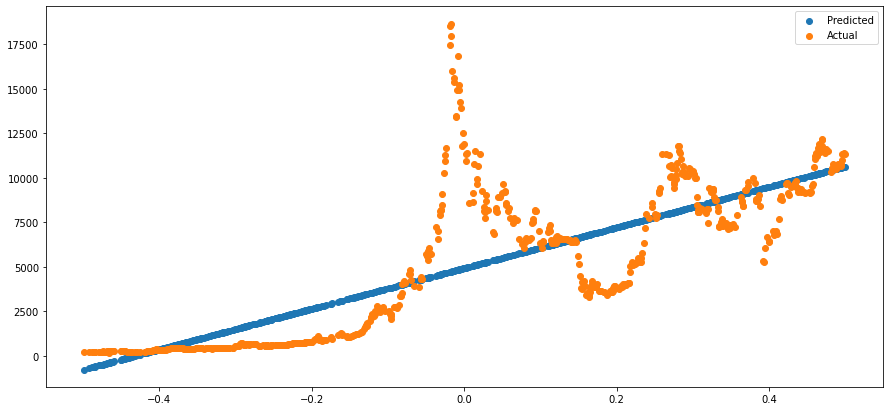

In [363]:
results = model.predict(X_test,detail=True,actual=y_test,plot=True)

# Multiple Linear Regression (Normal Equation Method)
We will use the linear features here (the mentioned above)
![image](img-1.png)

In [364]:
class Multiple_LR:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.is_fit = False
        self.weights = None
    
    def calculate_weights(self):
        self.weights = np.dot(np.linalg.inv(np.dot(np.transpose(self.X),self.X)),
                              np.dot(np.transpose(self.X),self.y))
        self.is_fit = True
    
    def info(self):
        if(self.is_fit):
            print("Weights : ", self.weights)
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")

    def predict(self,x, detail = False, actual = None, plot=False):
        if (self.is_fit):
            y_predicted = np.dot(x,self.weights)
#             print(y_predicted)
            if detail:
                print("MAE : ", round(mean_absolute_error(actual=actual,predicted=y_predicted),2))
                print("RMSE : ", round(root_mean_square_error(actual=actual,predicted=y_predicted),2))
            
            if plot:
                plt.figure(figsize=(15,7))
                plt.scatter(x=list(range(len(x))),y=y_predicted,label='Predicted')
                plt.scatter(x=list(range(len(x))),y=actual,label='Actual')
                plt.legend()
                plt.show()
            
            return y_predicted
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")


In [365]:
x = df[['high','low','open','close','volumeto','volumefrom']].to_numpy()
y = df[df.columns[-1]].to_numpy()

scaler = Scaler(x)
x_scaled = scaler.min_max_normalization()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [366]:
model = Multiple_LR(X=X_train,y=y_train)
model.calculate_weights()
model.info()

Weights :  [ 3.27157316e+10  3.78105901e+09 -1.82966453e+10 -1.79383748e+10
  3.86128496e+04 -2.62317039e+08]


MAE :  1945.72
RMSE :  2338.16


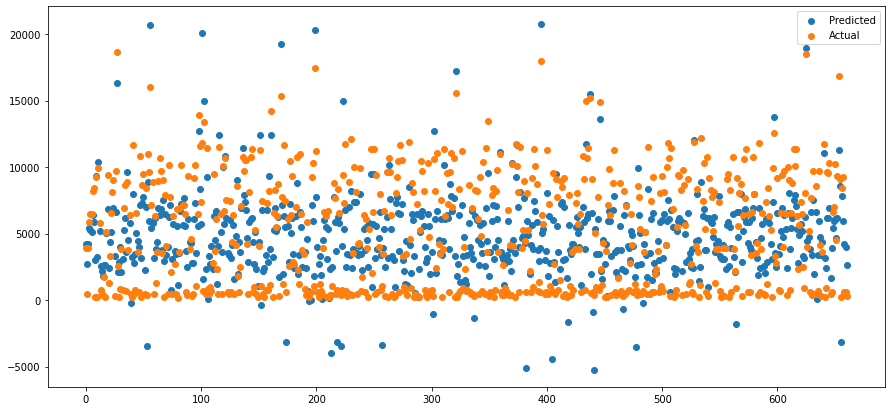

In [367]:
results = model.predict(X_test,detail=True,actual=y_test,plot=True)

# Univariate Linear Regression (Gradient Descent)
![image](img.png)

In [368]:
class Simple_LR_GD:
    def __init__(self, X, y, iterations = 1000, learning_rate = 0.01):
        self.X = X
        self.y = y
        self.iterations = iterations
        self.is_fit = False
        self.slope = 0
        self.learning_rate = learning_rate
        self.intercept = 0
        
    def calculate_weights(self):
        n = len(self.y)
        for i in range(self.iterations): 
            
            predicted = np.add(np.multiply(self.slope,self.X), self.intercept) # y = mx + c
            
            slope_derivative = (-2/n) * np.sum(np.multiply(self.X,np.subtract(self.y, predicted)))
            intercept_derivative = (-2/n) * np.sum(np.subtract(self.y, predicted))
            
            self.slope = self.slope - (self.learning_rate * slope_derivative)
            self.intercept = self.intercept - (self.learning_rate * intercept_derivative)
        
        self.is_fit = True
    
    def info(self):
        if(self.is_fit):
            print("Slope : ", self.slope)
            print("Intercept : ", self.intercept)
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")

    def predict(self,x, detail = False, actual = None, plot=False):
        if (self.is_fit):
            y_predicted = np.add(self.intercept,np.multiply(self.slope,x))
            if detail:
                print("MAE : ", round(mean_absolute_error(actual=actual,predicted=y_predicted),2))
                print("RMSE : ", round(root_mean_square_error(actual=actual,predicted=y_predicted),2))
            
            if plot:
                plt.figure(figsize=(15,7))
                plt.scatter(x=x,y=y_predicted,label='Predicted')
                plt.scatter(x=x,y=actual,label='Actual')
                plt.legend()
                plt.show()
            
            return y_predicted
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")


In [369]:
y = df.average.to_numpy()
x = df.time.to_numpy()

scaler = Scaler(x)
x_scaled = scaler.min_max_normalization()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [370]:
model = Simple_LR_GD(X_train,y_train)

In [371]:
model.calculate_weights()
model.info()

Slope :  9263.927796176547
Intercept :  4924.504689519178


MAE :  1919.92
RMSE :  2657.18


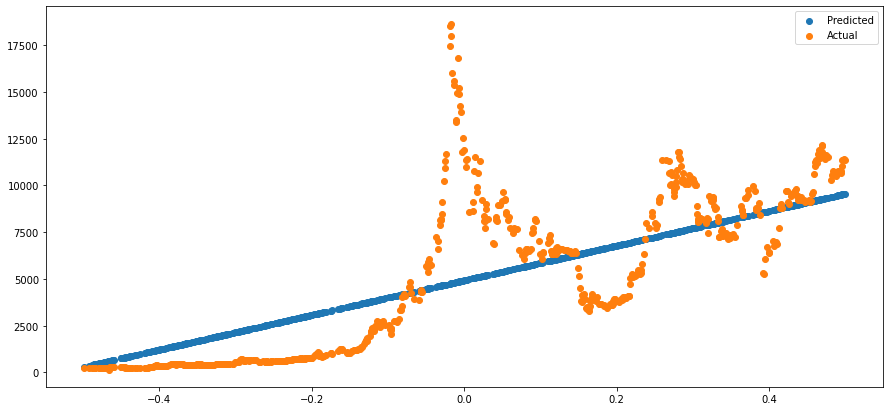

In [372]:
results = model.predict(X_test,detail=True,actual=y_test,plot=True)

# Multiple Linear Regression (Gradient Descent) [source](https://www.kaggle.com/rakend/multiple-linear-regression-with-gradient-descent)
We can initialize theta-0 as 1 ***(bias)*** but for simplicity, I am excluding the bias

![image](img-3.png)

In [373]:
class Multiple_LR_GD:
    def __init__(self, X, y, iterations = 10000, learning_rate = 0.1):
        self.X = X
        self.y = y
        self.iterations = iterations
        self.is_fit = False
        self.learning_rate = learning_rate
        self.weights = np.random.rand(6)
        
    def calculate_weights(self):
        n = len(self.y)
        for i in range(self.iterations): 
            
            predicted = np.dot(self.X, self.weights)

#             weight_derivative = (1/n) * np.sum(np.multiply(self.X.T,np.subtract(self.y, predicted)))
#             self.weights = self.weights - (self.learning_rate * weight_derivative)
            
            error = predicted - self.y            
            self.weights = self.weights - (self.learning_rate * (1/n) * np.dot(self.X.T, error))
            
        self.is_fit = True


    def info(self):
        if(self.is_fit):
            print("Weights : ", self.weights)
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")
    
    
    def predict(self,x, detail = False, actual = None, plot=False):
        if (self.is_fit):
            y_predicted = np.dot(x, self.weights)
            if detail:
                print("MAE : ", round(mean_absolute_error(actual=actual,predicted=y_predicted),2))
                print("RMSE : ", round(root_mean_square_error(actual=actual,predicted=y_predicted),2))
            
            if plot:
                plt.figure(figsize=(15,7))
                plt.scatter(x=list(range(len(x))),y=y_predicted,label='Predicted')
                plt.scatter(x=list(range(len(x))),y=actual,label='Actual')
                plt.legend()
                plt.show()
            
            return y_predicted
        else:
            print("Model Weights are not Calculated. Try calling calculate_weights()")


In [374]:
x = df[['high','low','open','close','volumeto','volumefrom']].to_numpy()
y = df[df.columns[-1]].to_numpy()

scaler = Scaler(x)
x_scaled = scaler.min_max_normalization()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [375]:
model = Multiple_LR_GD(X_train,y_train)
model.calculate_weights()
model.info()

Weights :  [-22026.58722842 -22027.01395069 -22026.58304828 -22027.06359715
  42926.96071216 -22021.22780733]


MAE :  2527.82
RMSE :  3666.26


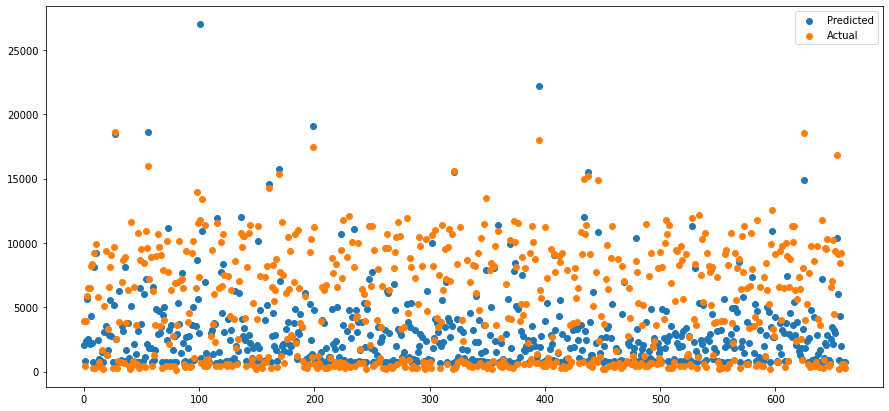

In [376]:
results = model.predict(X_test,actual=y_test,detail=True,plot=True)

# Polynomial Regression (sklearn)

In [384]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### The following figure shows that we can generalize a diagonal parabola (degree-2) graph in the data better

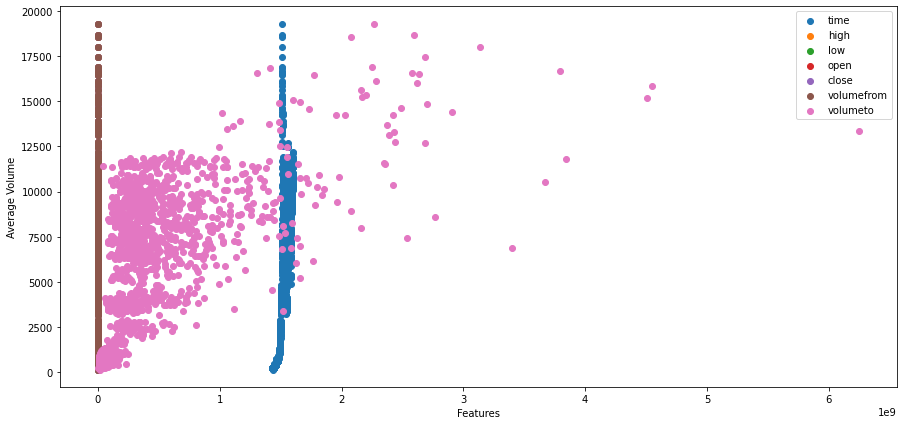

In [430]:
scatter_plot = plt.figure(figsize=(15,7))
target = 'average'
features = df.columns[0:-1]
for feature in features:
    plt.scatter(x=df[feature],y=df[target],label=feature,marker='o')
plt.xlabel("Features")
plt.ylabel("Average Volume")
plt.legend()
# plt.xkcd()
plt.show()

In [432]:
x = df[['high','low','open','close','volumeto','volumefrom']].to_numpy()
y = df[df.columns[-1]].to_numpy()

scaler = Scaler(x)
x_scaled = scaler.min_max_normalization()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [433]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [434]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
poly_results = poly_model.predict(X_test_poly)

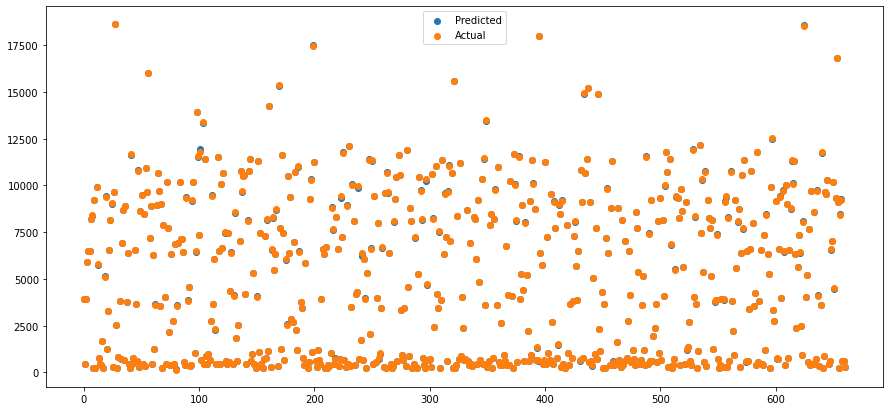

In [441]:
plt.figure(figsize=(15,7))
plt.scatter(x=list(range(len(y_test))),y=poly_results,label="Predicted")
plt.scatter(x=list(range(len(y_test))),y=y_test,label="Actual")
plt.legend()
plt.show()